In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/newtrain.csv')
df.head()

,Entity,Code,Year,Annual CO₂ emissions,Average surface temperature.1
0,Afghanistan,AFG,1949,14656.0,10.509568
1,Afghanistan,AFG,1950,84272.0,10.231099
2,Afghanistan,AFG,1951,91600.0,11.242776
3,Afghanistan,AFG,1952,91600.0,11.292889
4,Afghanistan,AFG,1953,106256.0,11.445119


In [16]:
france = df[df['Entity'] == 'India']

In [ ]:
france.head()

In [ ]:
france.tail()

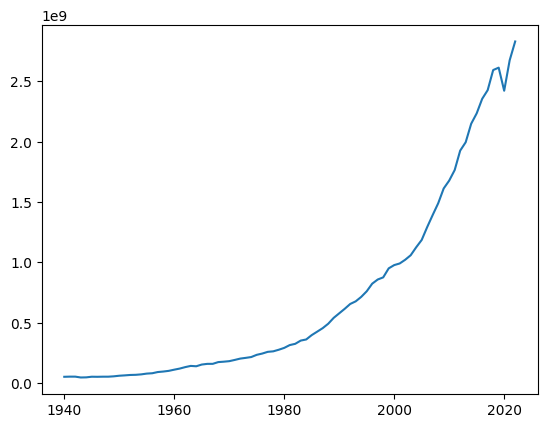

In [17]:
plt.plot(france['Year'], france['Annual CO₂ emissions'])
plt.show()

# Autoregressive model
$f(t+1) = \beta_0 + \beta_1x_1 + \beta_2x_2$

## Autocorrelation

In [18]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

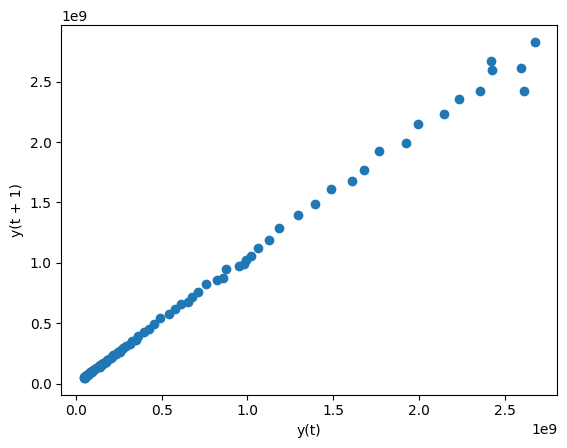

In [19]:
lag_plot(france['Annual CO₂ emissions'])

In [4]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
france = pd.Series(france['Annual CO₂ emissions'].values, index=france['Year'])
france.index = pd.to_datetime(france.index, format='%Y')
france.index = pd.date_range(start=france.index[0], periods=len(france), freq='YE')
france.head()

1940-12-31     76850.0
1941-12-31    102414.0
1942-12-31    142629.0
1943-12-31    219573.0
1944-12-31    171851.0
Freq: YE-DEC, dtype: float64

## Test de Dickey-Fuller

In [5]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def find_d(serie, d=0, max_diff=2):
    result = adfuller(serie)
    if result[1] < 0.05 or d == max_diff: 
        return d
    else:
        diff_serie = serie.diff().dropna()
        return find_d(diff_serie, d+1, max_diff)

In [19]:
import pmdarima as pm
model = pm.auto_arima(france)

print(model)

 ARIMA(0,1,0)(0,0,0)[0]          


In [20]:
p = model.order[0]
d = model.order[1]
q = model.order[2]

print(f"p: {p}, d: {d}, q: {q}")

model = ARIMA(france, order=(p, d, q))
model_fit = model.fit()

p: 0, d: 1, q: 0


In [21]:
STEPS = 10
forecast = model_fit.forecast(steps=STEPS)

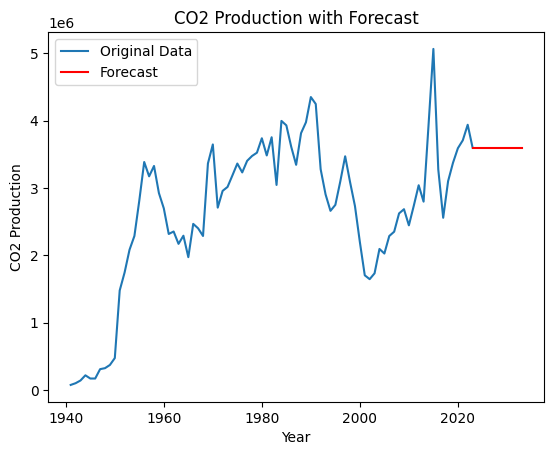

In [22]:
france_with_forecast = pd.concat([france, forecast])

original_data = france_with_forecast.iloc[:-STEPS]
forecast_data = france_with_forecast.iloc[-STEPS:]

# Tracé des données originales
plt.plot(original_data.index, original_data, label='Original Data')

# Tracé des prévisions, y compris le dernier point des données originales pour garantir la continuité
# On commence par le dernier point de original_data pour connecter les deux séries
forecast_index_with_continuation = pd.concat([original_data.tail(1), forecast_data]).index
forecast_data_with_continuation = pd.concat([original_data.tail(1), forecast_data])

plt.plot(forecast_index_with_continuation, forecast_data_with_continuation, color='red', label='Forecast')

# Ajout des titres et légendes
plt.title('CO2 Production with Forecast')
plt.xlabel('Year')
plt.ylabel('CO2 Production')
plt.legend()

# Affichage du graphique
plt.show()

In [7]:
def get_diff(fd):
    first = fd.iloc[0]
    last = fd.iloc[-1]
    return ((last / first) * 100) - 100

def get_mean(fd):
    return fd.mean()

def get_diff2(fd):
    first = fd.iloc[0]
    last = fd.iloc[-1]
    return last - first

# Classification des pays

In [9]:
countries = df['Entity'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Gree

In [12]:
import pmdarima as pm
hist = {}
for country in countries:
    c = df[df['Entity'] == country]
    c = pd.Series(c['Annual CO₂ emissions'].values, index=c['Year'])
    c.index = pd.to_datetime(c.index, format='%Y')
    c.index = pd.date_range(start=c.index[0], periods=len(c), freq='YE')

    #model = pm.auto_arima(c)   

    p = 5
    d = find_d(c, 0, 2)
    q = 1

    model = ARIMA(c, order=(p, d, q))
    model_fit = model.fit()

    STEPS = 10
    forecast = model_fit.forecast(steps=STEPS)
    hist[country] = get_diff2(forecast)

/Users/Jayson/Documents/miage/M2/climate/.climate/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/Jayson/Documents/miage/M2/climate/.climate/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/Jayson/Documents/miage/M2/climate/.climate/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/Jayson/Documents/miage/M2/climate/.climate/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters f

In [13]:
sorted_hist = dict(sorted(hist.items(), key=lambda x: x[1], reverse=True))

In [14]:
sorted_hist.items()

dict_items([('India', 595198579.662754), ('World', 516071121.3592377), ('China', 292283054.82769203), ('Vietnam', 206998096.4595365), ('Indonesia', 162290273.52165198), ('Turkey', 79658186.36476082), ('Malaysia', 65328127.40416217), ('Brazil', 57006889.457224965), ('Mexico', 51375910.62548339), ('United Arab Emirates', 46161450.99178925), ('Egypt', 45259376.0621447), ('Bangladesh', 36059675.36019623), ('Iran', 30348581.872630715), ('Iraq', 25440618.97876817), ('United States', 18778317.28117752), ('Uzbekistan', 17834740.247692555), ('Philippines', 16856485.010388613), ('Mongolia', 14543479.59346506), ('Thailand', 14345056.578923345), ('Qatar', 12271274.705254182), ('Chile', 11722853.211256236), ('Kenya', 11232521.778328411), ('Germany', 11227799.464146733), ('Peru', 10510811.042085178), ('Canada', 10411202.37135315), ('Morocco', 9094495.998771891), ('Ghana', 8996095.334842205), ('Oman', 7492135.104946911), ('Myanmar', 7477577.220577061), ('Tanzania', 7323179.707878033), ('Cambodia', 64

In [15]:
# hist to csv
hist_df = pd.DataFrame(sorted_hist.items(), columns=['Country', 'Forecast'])
hist_df.to_csv('data/forecast4.csv', index=False)

In [ ]:
# normalise hist_df

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

hist_df['Forecast'] = scaler.fit_transform(hist_df[['Forecast']])
hist_df.to_csv('data/forecast_minmax.csv', index=False)

# Code de Clément

In [41]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import normalize
import numpy as np

In [48]:
data = pd.read_csv('data/forecast3.csv')

seuils = np.array([-300,-15,-5,0, 5, 15, 300])
labels = ['forte diminution (> -15%)', 'diminution modéré (-15% et -5%)', 'diminution faible (-5% et 0%)', 'augmentation faible (0-5%)', 'augmentation modéré (5-15%)', 'augmentation élevé (>15%)']
colors_scale = ['#08306b', '#6baed6', '#9ecae1', '#feb24c', '#fd8d3c', '#fc4e2a']
color_map = {label: color for label, color in zip(labels, colors_scale)}

data['CO2'] = pd.cut(data['Forecast'], bins=seuils, labels=labels, include_lowest=True)

data['Color'] = data['CO2'].replace(color_map)

fig = px.choropleth(data,  # les données
                    locations='Country',  # la colonne avec les noms de pays
                    locationmode='country names',  # le mode de localisation est basé sur les noms des pays
                    color='CO2',  # la colonne avec les valeurs à représenter
                    color_discrete_map=color_map,
                    hover_name='Country',  # le nom à afficher lorsqu'on survole un pays
                    color_continuous_scale=colors_scale,  # échelle de couleur personnalisée
                    range_color=(np.min(seuils), np.max(seuils)),  # plage de valeurs
                    labels=dict(zip(seuils, labels)))  # étiquettes de légende

/var/folders/ky/1wm4y72s6vv4yc8wyfnz3b9c0000gq/T/ipykernel_78024/2456036615.py:10: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [49]:
fig.update_layout(title="Variation du taux d'émission de CO2 par pays")

In [50]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import normalize
import numpy as np

data = pd.read_csv('data/forecast4.csv')

seuils = np.array([-10000000000,-1000000,-10000,0, 10000, 1000000, 100000000000])
labels = ['forte diminution (> -1000000)', 'diminution modéré (-1000000 et -10000)', 'diminution faible (-10000 et 0)', 'augmentation faible (0-10000)', 'augmentation modéré (10000-1000000)', 'augmentation élevé (>1000000)']
colors_scale = ['#08306b', '#6baed6', '#9ecae1', '#feb24c', '#fd8d3c', '#fc4e2a']
color_map = {label: color for label, color in zip(labels, colors_scale)}

data['CO2'] = pd.cut(data['Forecast'], bins=seuils, labels=labels, include_lowest=True)

data['Color'] = data['CO2'].replace(color_map)

fig = px.choropleth(data,  # les données
                    locations='Country',  # la colonne avec les noms de pays
                    locationmode='country names',  # le mode de localisation est basé sur les noms des pays
                    color='CO2',  # la colonne avec les valeurs à représenter
                    color_discrete_map=color_map,
                    hover_name='Country',  # le nom à afficher lorsqu'on survole un pays
                    color_continuous_scale=colors_scale,  # échelle de couleur personnalisée
                    range_color=(np.min(seuils), np.max(seuils)),  # plage de valeurs
                    labels=dict(zip(seuils, labels)))  # étiquettes de légende

/var/folders/ky/1wm4y72s6vv4yc8wyfnz3b9c0000gq/T/ipykernel_78024/2507566802.py:15: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [51]:
fig.update_layout(title='Variation de la quantité émise de CO2 par pays (en tonnes)')


In [31]:
fig.write_image('forecast4.png')